In [1]:
from dataset import PairedDatasetDouble
pd = PairedDatasetDouble('In/0', 'In/1', 'Out_New', 220)

Length of x_train 0 files: 943
Length of x_train 1 files: 943
Length of y_train files: 943
Item 0 with max: 3482 and min: -2180
Normalized item 0 with max: 1.0 and min: 0.0
Item 1 with max: 1681 and min: -1108
Normalized item 1 with max: 1.0 and min: 0.0
Item 2 with max: 5660 and min: -2212
Normalized item 2 with max: 1.0 and min: 0.0
Item 3 with max: 3564 and min: -1221
Normalized item 3 with max: 1.0 and min: 0.0
Item 4 with max: 3452 and min: -2218
Normalized item 4 with max: 1.0 and min: 0.0
Item 5 with max: 3378 and min: -2213
Normalized item 5 with max: 1.0 and min: 0.0
Item 6 with max: 3744 and min: -2186
Normalized item 6 with max: 1.0 and min: 0.0
Item 7 with max: 3495 and min: -2201
Normalized item 7 with max: 1.0 and min: 0.0
Item 8 with max: 1730 and min: -1078
Normalized item 8 with max: 1.0 and min: 0.0
Item 9 with max: 3420 and min: -1118
Normalized item 9 with max: 1.0 and min: 0.0
Item 10 with max: 3547 and min: -2167
Normalized item 10 with max: 1.0 and min: 0.0
Item 

In [2]:
!conda install -y tensorflow-gpu"=>2.1.0"

Solving environment: \ 
The environment is inconsistent, please check the package plan carefully
The following packages are causing the inconsistency:

  - defaults/linux-64::pandas==1.0.1=py36h0573a6f_0
  - defaults/noarch::jupyterlab==1.2.6=pyhf63ae98_0
  - defaults/linux-64::scikit-learn==0.22.1=py36hd81dba3_0
  - defaults/linux-64::python-language-server==0.31.7=py36_0
  - defaults/linux-64::bkcharts==0.2=py36_0
  - defaults/linux-64::nb_conda==2.2.1=py36_0
  - defaults/noarch::numpydoc==0.9.2=py_0
  - defaults/linux-64::pytest-arraydiff==0.3=py36h39e3cac_0
  - defaults/linux-64::bottleneck==1.3.2=py36heb32a55_0
  - defaults/linux-64::pywavelets==1.1.1=py36h7b6447c_0
  - defaults/noarch::pytest-astropy==0.8.0=py_0
  - defaults/linux-64::numexpr==2.7.1=py36h423224d_0
  - defaults/noarch::anaconda-project==0.8.4=py_0
  - defaults/linux-64::nbconvert==5.6.1=py36_0
  - defaults/linux-64::h5py==2.10.0=py36h7918eee_0
  - defaults/linux-64::bokeh==1.4.0=py36_0
  - defaults/noarch::jupyter

In [3]:
from tensorflow.keras.models import load_model
from tensorflow.keras.models import model_from_json

double_model = load_model('dual_model_final.h5')

with open('model_arch.json', 'r') as f:
    single_model = model_from_json(f.read())
    
single_model.load_weights('model_weights.h5')
print("Single and Double AE Models Loaded")

Single and Double AE Models Loaded


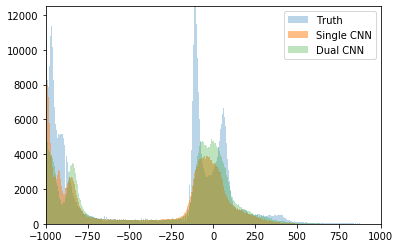

0


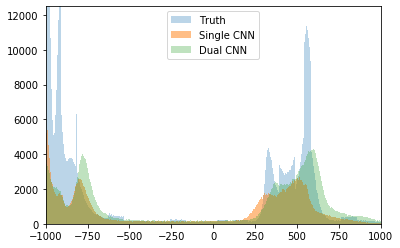

1


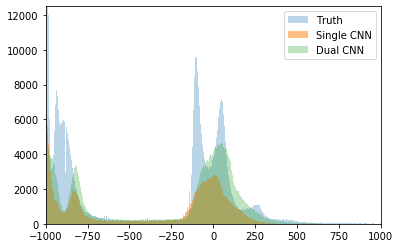

2


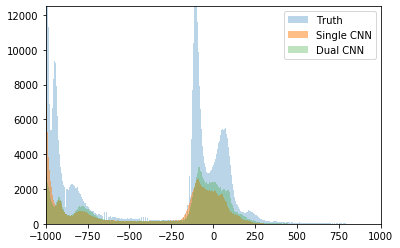

3


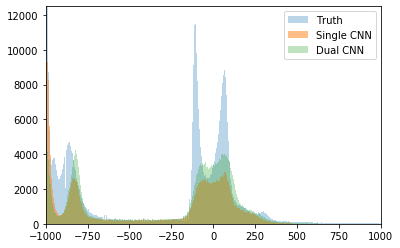

4


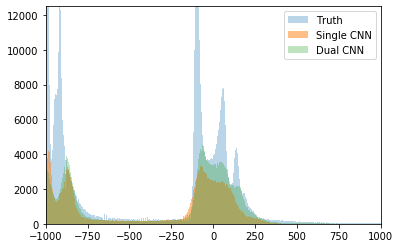

5


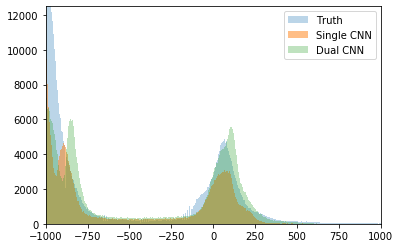

6


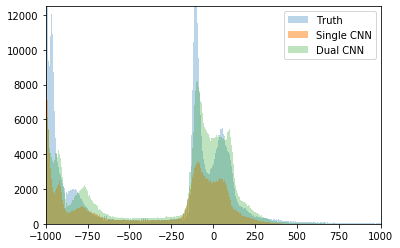

7


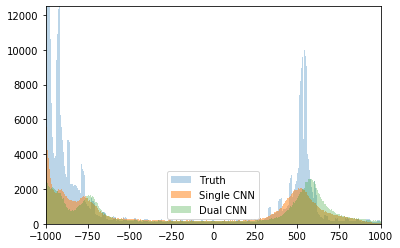

8


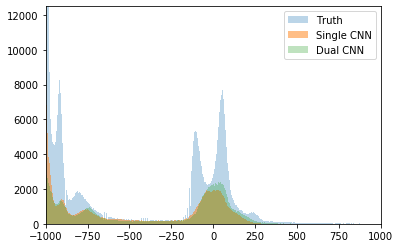

9


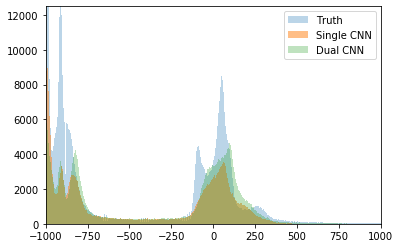

10


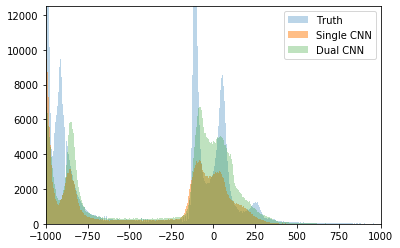

11


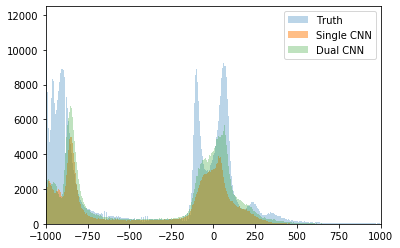

12


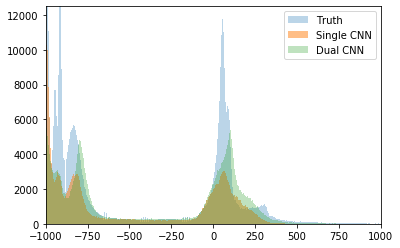

13


KeyboardInterrupt: 

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
from copy import deepcopy

def scale(x, out_range=(-1, 1)):
    domain = 0, 1
    y = (x - (domain[1] + domain[0]) / 2) / (domain[1] - domain[0])
    return y * (out_range[1] - out_range[0]) + (out_range[1] + out_range[0]) / 2

def plot_hists(truth, single, double):
    
    truu = np.ravel(truth)
    singg = np.ravel(single)
    dubb = np.ravel(double)
    
    truth_hist = np.ravel(scale(truth, (-1000, 3000)))
    single_hist = np.ravel(scale(single, (-1000, 3000)))
    double_hist = np.ravel(scale(double, (-1000, 3000)))
    
    plt.hist(truth_hist, bins = 2000, alpha = 0.3, label = "Truth")
    plt.hist(single_hist, bins = 2000, alpha = 0.5, label = "Single CNN")
    plt.hist(double_hist, bins = 2000, alpha = 0.3, label = "Dual CNN")
    plt.xlim(-1000, 1000)
    plt.ylim(0, 12500)
    plt.legend()
    plt.show()
    
for i in range(0, 220):
    
    input_1 = pd.x_train_0[i]
    input_2 = pd.x_train_1[i]
    
    input_1 = np.reshape(input_1, (1, 1024, 1024, 1))
    input_2 = np.reshape(input_2, (1, 1024, 1024, 1))
    
    output_single = single_model.predict(input_1)
    output_double = double_model.predict([input_1, input_2])
    
    output_single = np.reshape(output_single, (128, 128, 128))
    output_double = np.reshape(output_double, (128, 128, 128))
    
    original = pd.y_train[i]
    
    plot_hists(original, output_single, output_double)
    print(i)

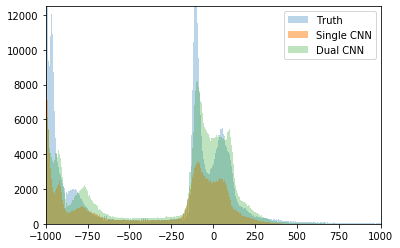

7


In [8]:
for i in range(7, 8):
    
    input_1 = pd.x_train_0[i]
    input_2 = pd.x_train_1[i]
    
    input_1 = np.reshape(input_1, (1, 1024, 1024, 1))
    input_2 = np.reshape(input_2, (1, 1024, 1024, 1))
    
    output_single = single_model.predict(input_1)
    output_double = double_model.predict([input_1, input_2])
    
    output_single = np.reshape(output_single, (128, 128, 128))
    output_double = np.reshape(output_double, (128, 128, 128))
    
    original = pd.y_train[i]
    
    plot_hists(original, output_single, output_double)
    print(i)

In [9]:
for i in range(7, 8):
    
    input_1 = pd.x_train_0[i]
    input_2 = pd.x_train_1[i]
    
    input_1 = np.reshape(input_1, (1, 1024, 1024, 1))
    input_2 = np.reshape(input_2, (1, 1024, 1024, 1))
    
    output_single = single_model.predict(input_1)
    output_double = double_model.predict([input_1, input_2])
    
    output_single = np.reshape(output_single, (128, 128, 128))
    output_double = np.reshape(output_double, (128, 128, 128))
    
    original = pd.y_train[i]
    
    np.save('7org.npy', original)
    np.save('7single.npy', output_single)
    np.save('7double.npy', output_double)